# Imports and variables

In [1]:
import pickle
import numpy as np
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from src.results import get_panel_data, get_best_scores_table, get_scores_skills_table

In [2]:
ens_method = "rand_init"
ens_method_ls = [
    "rand_init",
    "bagging",
    "batchensemble",
    "bayesian",
    "mc_dropout",
    "concrete_dropout",
    "variational_dropout",
]
ens_method_labels = {
    "rand_init": "Naive",
    "bagging": "Bagging",
    "batchensemble": "BatchEns.",
    "bayesian": "Bayesian",
    "mc_dropout": "MC D.",
    "concrete_dropout": "Conc. D.",
    "variational_dropout": "Var. D.",
}
dataset_ls = [
    "boston",
    "concrete",
    "energy",
    "kin8nm",
    "naval",
    "power",
    "protein",
    "wine",
    "yacht",
]
dataset_labels = {
    "boston": "Boston Housing \n (N=506)",
    "concrete": "Concrete Strength \n (N=1,030)",
    "energy": "Energy Efficiency \n (N=768)",
    "kin8nm": "Kin8nm \n (N=8,192)",
    "naval": "Naval Propulsion \n (N=11,934)",
    "power": "Power Plant \n (N=9,568)",
    "protein": "Protein Structure \n (N=45,730)",
    "wine": "Red Wine Quality \n (N=1,599)",
    "yacht": "Yacht Hydrodynamics \n (N=308)"
}
agg_labels = {
    "lp": r"$LP$",
    "vi": r"$V_0^=$",
    "vi-a": r"$V_a^=$",
    "vi-w": r"$V_0^w$",
    "vi-aw": r"$V_a^w$",
}

In [3]:
# Get colors
agg_cols = sns.color_palette("Dark2", 8, as_cmap=True)
# Colors of aggregation methods
agg_col = {
    "lp": agg_cols.colors[4],  # type: ignore
    "vi": agg_cols.colors[5],  # type: ignore
    "vi-a": agg_cols.colors[2],  # type: ignore
    "vi-w": agg_cols.colors[0],  # type: ignore
    "vi-aw": agg_cols.colors[3],  # type: ignore
    "ens": agg_cols.colors[7],  # type: ignore
    "opt": agg_cols.colors[1],  # type: ignore
}

greens = sns.color_palette("Greens", 2, as_cmap=False)
blues = sns.color_palette("Blues", 1)
purples = sns.color_palette("Purples", 1)
reds = sns.color_palette("Reds", 3)
ens_col = {
    "rand_init": greens[1], #multi_model_cols.colors[0],  # type: ignore
    "bagging": greens[0], #multi_model_cols.colors[1],  # type: ignore
    "batchensemble": blues[0], #multi_model_cols.colors[3],  # type: ignore
    "bayesian": purples[0], #multi_model_cols.colors[8],  # type: ignore
    "mc_dropout": reds[2], #dropout_cols.colors[14],  # type: ignore
    "variational_dropout": reds[1], #dropout_cols.colors[16],  # type: ignore
    "concrete_dropout": reds[0], #dropout_cols.colors[15],  # type: ignore
}

# KIT colors
kit_cols_dict = {
    "green": "#00876C",
    "blue": "#4664AA",
    "black": "#000000",
    "grey": "#404040",
}

In [4]:
score_vec = ["crps", "crpss", "me", "lgt", "cov", "a", "w"]
distr_ls = ["drn"]
n_ens_vec = np.arange(start=2, stop=20 + 2, step=2)
agg_meths = ["lp", "vi", "vi-a", "vi-w", "vi-aw"]

In [5]:
export = True
save_dir = os.path.join("plots", "results")

# Get truncation scores

In [6]:
# Get all skills table
data_path = os.path.join("..", "..", "04_Experiments", "Normal_final")
df_scores_norm, df_skills_norm = get_scores_skills_table(data_path, dataset_ls, score_vec, distr_ls, n_ens_vec, agg_meths, ens_method_ls)  # type: ignore

dataset_ls_tnorm = [
    "naval",
    "wine",
]
data_path = data_path.replace("Normal_final", "t_Normal_final")
df_scores_tnorm, df_skills_tnorm = get_scores_skills_table(data_path, dataset_ls_tnorm, score_vec, distr_ls, n_ens_vec, agg_meths, ens_method_ls)  # type: ignore

data_path = data_path.replace("t_Normal_final", "0t_Normal_final")
df_scores_0tnorm, df_skills_0tnorm = get_scores_skills_table(data_path, dataset_ls, score_vec, distr_ls, n_ens_vec, agg_meths, ens_method_ls)  # type: ignore

df_scores_norm["distr"] = "norm"
df_skills_norm["distr"] = "norm"
df_scores_tnorm["distr"] = "tnorm"
df_skills_tnorm["distr"] = "tnorm"
df_scores_0tnorm["distr"] = "0tnorm"
df_skills_0tnorm["distr"] = "0tnorm"

In [7]:
df_scores = pd.concat([df_scores_norm, df_scores_tnorm, df_scores_0tnorm], ignore_index=True)
df_skills = pd.concat([df_skills_norm, df_skills_tnorm, df_skills_0tnorm], ignore_index=True)

In [8]:
df_scores[(df_scores["dataset"] == "wine") & (df_scores["nn"] == "drn")].sort_values("score_20", ascending=True)

,ens_method,dataset,nn,agg,score_2,score_4,score_6,score_8,score_10,score_12,score_14,score_16,score_18,score_20,avg_score,distr
385,rand_init,wine,drn,vi,0.353600,0.353438,0.353300,0.353076,0.352942,0.352822,0.352772,0.352793,0.352708,0.352731,0.353018,tnorm
384,rand_init,wine,drn,lp,0.353911,0.353421,0.353292,0.353206,0.353353,0.352780,0.352919,0.352748,0.352600,0.352836,0.353107,tnorm
396,bagging,wine,drn,lp,0.356048,0.354488,0.354483,0.353405,0.353775,0.353389,0.353517,0.352871,0.353117,0.353019,0.353811,tnorm
386,rand_init,wine,drn,vi-a,0.353988,0.353852,0.353648,0.353333,0.353222,0.353069,0.353077,0.353083,0.353044,0.353040,0.353335,tnorm
387,rand_init,wine,drn,vi-w,0.354054,0.353920,0.353731,0.353412,0.353279,0.353155,0.353152,0.353116,0.353096,0.353175,0.353409,tnorm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,variational_dropout,wine,drn,vi-a,0.954065,0.954187,0.954478,0.954554,0.954488,0.954481,0.954493,0.954478,0.954467,0.954434,0.954412,0tnorm
831,variational_dropout,wine,drn,vi-w,0.997527,0.997710,0.997876,0.997891,0.997874,0.997850,0.997850,0.997803,0.997761,0.997760,0.997790,0tnorm
829,variational_dropout,wine,drn,vi,1.011731,1.012063,1.012222,1.012240,1.012253,1.012246,1.012242,1.012238,1.012225,1.012221,1.012168,0tnorm
833,variational_dropout,wine,drn,ens,1.012040,1.012175,1.012284,1.012251,1.012275,1.012287,1.012267,1.012279,1.012252,1.012258,1.012237,0tnorm


In [9]:
distr_ls = ["norm", "0tnorm", "tnorm"]

### Analyze ensemble mean

In [10]:
df_scores[(df_scores["agg"] == "lp") & (df_scores["nn"] == "bqn")]

,ens_method,dataset,nn,agg,score_2,score_4,score_6,score_8,score_10,score_12,score_14,score_16,score_18,score_20,avg_score,distr


# Final Plots

## Compare skills

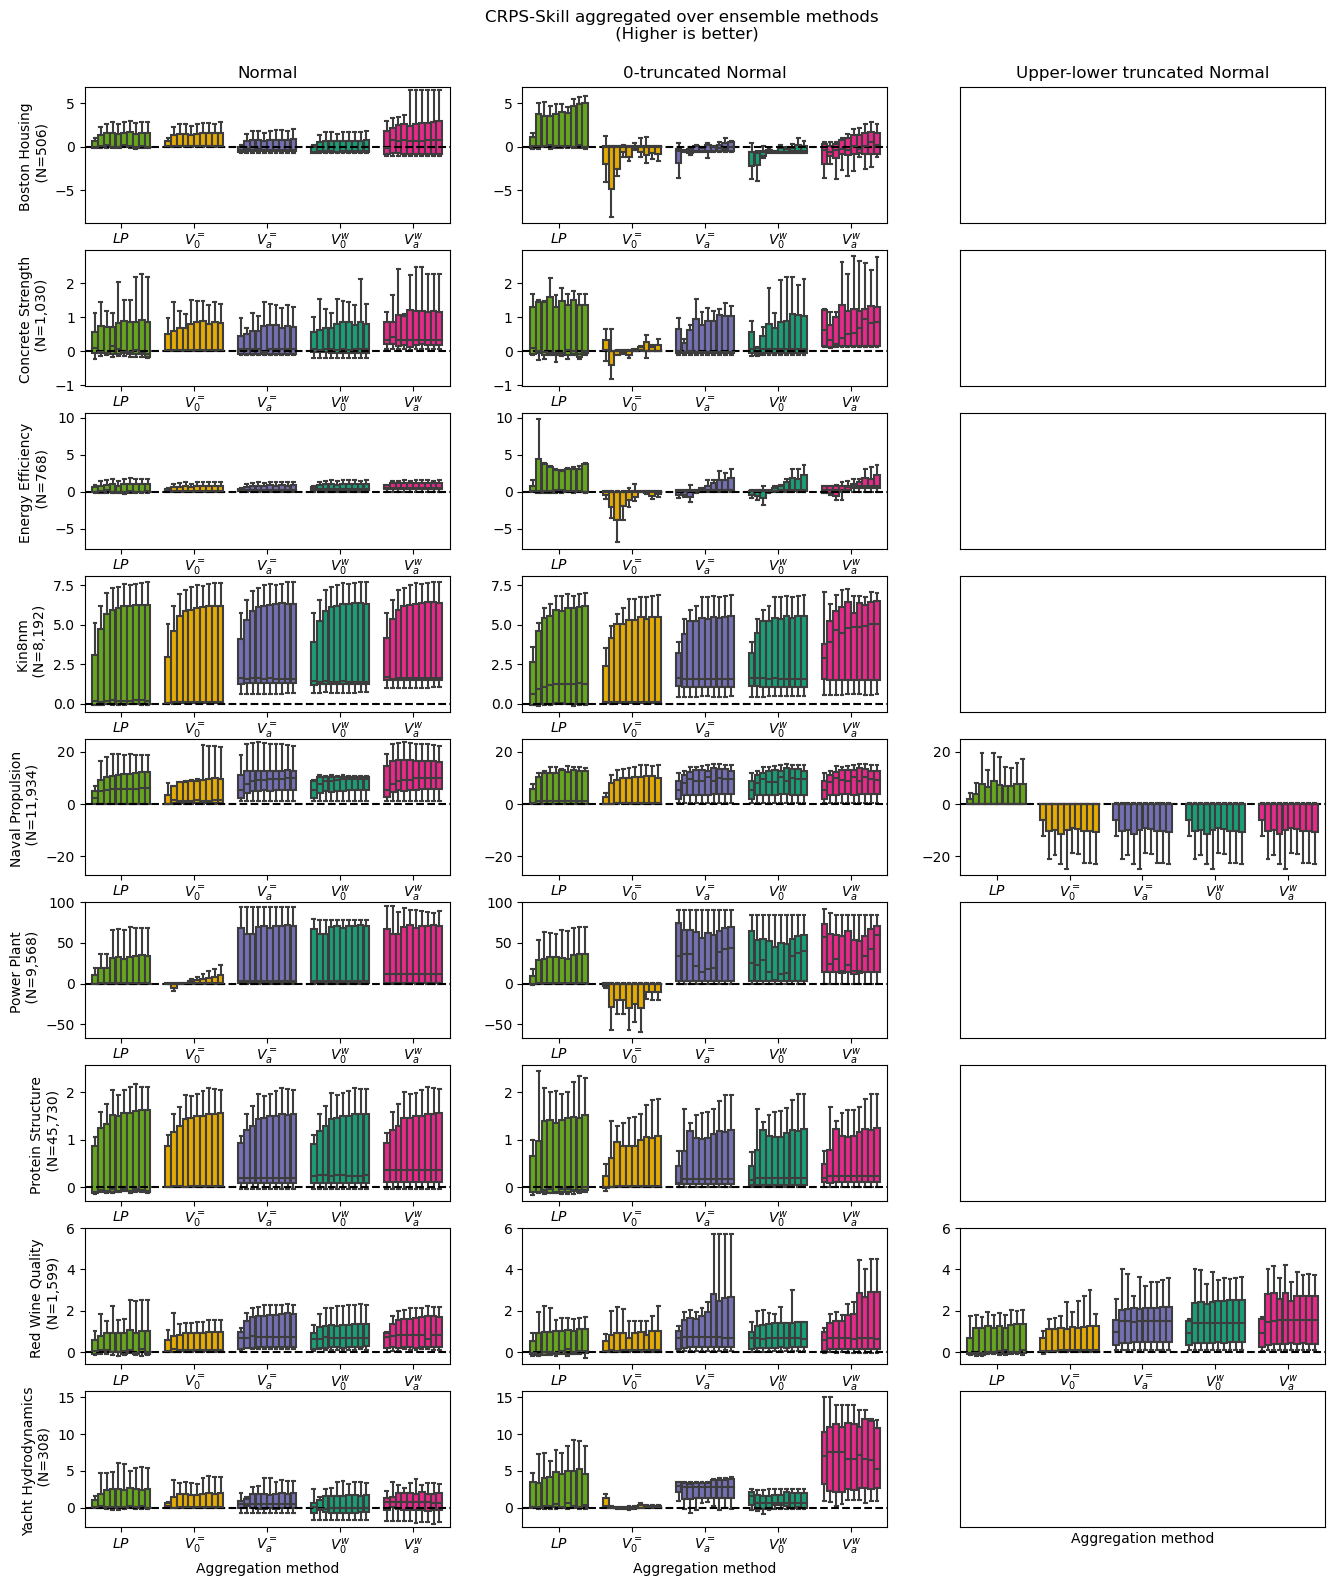

In [12]:
##### Skill - Boxplots - x=aggregation_methods #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(distr_ls), figsize=(16,16*1.2), squeeze=False)

# Iterate over distr types and datasets
for i_distr, distr in enumerate(distr_ls):
    df_distr = df_skills[df_skills["distr"] == distr]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_distr_dataset = df_distr[(df_distr["dataset"] == dataset)]
        # Melt dataframe for sns plots
        df_melt = pd.melt(df_distr_dataset, id_vars=["ens_method", "dataset", "distr", "agg"], var_name="ensemble_size", value_name="skill")
        # Only use skills not differences
        df_final = df_melt[df_melt["ensemble_size"].isin([f"skill_{n_ens}" for n_ens in n_ens_vec])]
        
        if (distr=="tnorm") & (dataset not in dataset_ls_tnorm):
            # axs[i_dataset][i_distr].axhline(0, linestyle="--", color=kit_cols_dict["black"])
            axs[i_dataset][i_distr].tick_params(axis="both", which="both", left=False, labelleft=False, bottom=False, labelbottom=False)
            continue
    
        # Plot boxplots
        g = sns.boxplot(ax=axs[i_dataset][i_distr], data=df_final,
                 y="skill", x="agg", hue="ensemble_size", showfliers=False)
        
        # Add 0 line
        g.axhline(0, linestyle="--", color=kit_cols_dict["black"])
        # Add labels to x and y axis
        axs[i_dataset][i_distr].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_distr].set_xticklabels([agg_labels.get(agg) for agg in agg_meths])
        axs[i_dataset][i_distr].set_xlabel("")
        axs[len(dataset_ls)-1][i_distr].set_xlabel("Aggregation method")

        # Change color
        agg_col_ls = list(agg_col.values())[:5]
        boxes = axs[i_dataset][i_distr].findobj(matplotlib.patches.PathPatch)  # type: ignore
        for i, box in enumerate(boxes):
            box.set_facecolor(agg_col_ls[i//10])

# # Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)
handles, labels = axs[0][0].get_legend_handles_labels()

# Set y axis range
for ax_norm, ax_0tnorm, ax_tnorm in axs:
    norm_l, norm_u = ax_norm.get_ylim()
    t0norm_l, t0norm_u = ax_0tnorm.get_ylim()
    tnorm_l, tnorm_u = ax_tnorm.get_ylim()
    
    ax_norm.set_ylim(min(norm_l, t0norm_l, tnorm_l), max(norm_u, t0norm_u, tnorm_u))
    ax_0tnorm.set_ylim(min(norm_l, t0norm_l, tnorm_l), max(norm_u, t0norm_u, tnorm_u))
    ax_tnorm.set_ylim(min(norm_l, t0norm_l, tnorm_l), max(norm_u, t0norm_u, tnorm_u))

# Set titles and legends
axs[0][0].set_title("Normal")
axs[0][1].set_title("0-truncated Normal")
axs[0][2].set_title("Upper-lower truncated Normal")
fig.subplots_adjust(top=0.86)
fig.suptitle(f"CRPS-Skill aggregated over ensemble methods \n (Higher is better)", y=0.9)

# Save figure
if export:
    filename=os.path.join(save_dir, "06_skill_boxplot_per_agg_no_outliers.pdf")
    fig.savefig(filename, bbox_inches='tight')
    filename=os.path.join(save_dir, "06_skill_boxplot_per_agg_no_outliers.png")
    fig.savefig(filename, bbox_inches='tight')

## Get best score per dataset

In [13]:
best_scores = df_scores.sort_values(["dataset", "score_20"], ascending=True).groupby("dataset").head(1)
df_scores["rel_score"] = df_scores.apply(lambda row: float(row["score_20"] / best_scores[best_scores["dataset"] == row["dataset"]]["score_20"]), axis=1)

In [14]:
best_scores[best_scores["dataset"] == "naval"]

,ens_method,dataset,nn,agg,score_2,score_4,score_6,score_8,score_10,score_12,score_14,score_16,score_18,score_20,avg_score,distr
540,bagging,naval,drn,lp,0.001608,0.001474,0.001464,0.001437,0.001444,0.001439,0.001428,0.001426,0.001422,0.001425,0.001457,0tnorm


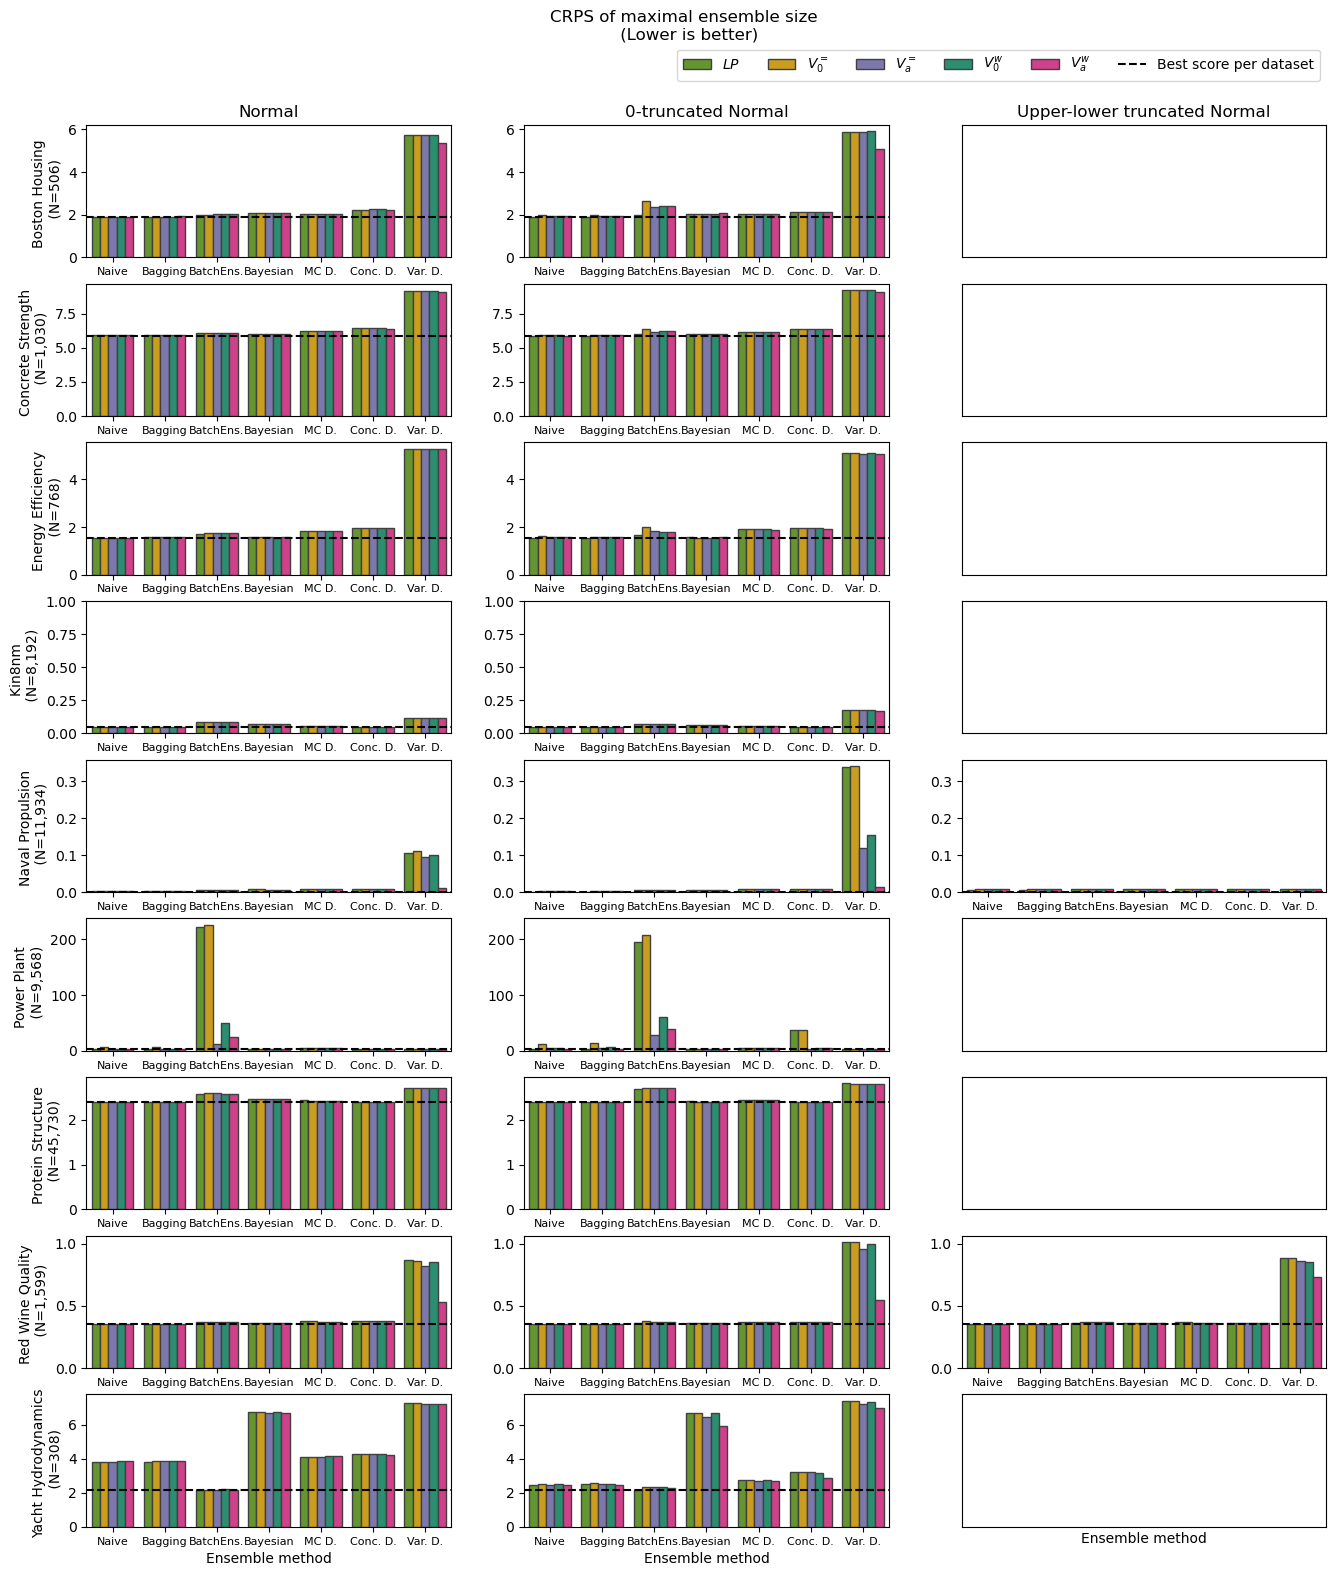

In [15]:
##### Relative score - Barplot - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(distr_ls), figsize=(16,16*1.2), squeeze=False)

# Filter out ensemble mean
df_no_ens = df_scores[df_scores["agg"] != "ens"]

# Iterate over distr types and datasets
for i_distr, distr in enumerate(distr_ls):
    # df_distr = pd.melt(df_scores[i_distr].reset_index(), id_vars="dataset", var_name="ens_method", value_vars=tables_rel[i_distr].columns, value_name="score")
    df_distr = df_no_ens[df_no_ens["distr"] == distr]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_distr_dataset = df_distr[df_distr["dataset"] == dataset]
        
        # Get best score for dataset
        best_score = best_scores[best_scores["dataset"] == dataset]["score_20"].iloc[0]
        
        if (distr=="tnorm") & (dataset not in dataset_ls_tnorm):
            # axs[i_dataset][i_distr].axhline(best_score, linestyle="--", color=kit_cols_dict["black"])
            axs[i_dataset][i_distr].tick_params(axis="both", which="both", left=False, labelleft=False, bottom=False, labelbottom=False)
            continue
        # Plot boxplots
        g = sns.barplot(data=df_distr_dataset, x="ens_method", y="score_20", hue="agg", ax=axs[i_dataset][i_distr], palette=agg_col, edgecolor=kit_cols_dict["grey"], order=ens_method_ls)
        
        # Add 0 line
        g.axhline(best_score, linestyle="--", color="black")
        # Add labels to x and y axis
        axs[i_dataset][i_distr].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_distr].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls], fontsize=8)
        axs[i_dataset][i_distr].set_xlabel("")
        axs[len(dataset_ls)-1][i_distr].set_xlabel("Ensemble method")
        

# Set y axis range
upper_limit = np.Inf
# Set y axis range
for ax_norm, ax_0tnorm, ax_tnorm in axs:
    norm_l, norm_u = ax_norm.get_ylim()
    t0norm_l, t0norm_u = ax_0tnorm.get_ylim()
    tnorm_l, tnorm_u = ax_tnorm.get_ylim()
    
    ax_norm.set_ylim(0, min(upper_limit, max(norm_u, t0norm_u, tnorm_u)))
    ax_0tnorm.set_ylim(0, min(upper_limit, max(norm_u, t0norm_u, tnorm_u)))
    ax_tnorm.set_ylim(0, min(upper_limit, max(norm_u, t0norm_u, tnorm_u)))
    

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)
axhline = matplotlib.lines.Line2D([0], [0], linestyle="dashed", color=kit_cols_dict["black"])  # type: ignore
handles.append(axhline)
labels = [agg_labels.get(agg) for agg in labels]
labels.append("Best score per dataset")

# Set titles and legends
axs[0][0].set_title("Normal")
axs[0][1].set_title("0-truncated Normal")
axs[0][2].set_title("Upper-lower truncated Normal")
fig.subplots_adjust(top=0.84)
fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.883), ncol=len(agg_meths)+1)
fig.suptitle(f"CRPS of maximal ensemble size \n (Lower is better)", y=0.9)

# Save figure
if export:
    filename=os.path.join(save_dir, "06_scores.pdf")
    fig.savefig(filename, bbox_inches='tight')
    filename=os.path.join(save_dir, "06_scores.png")
    fig.savefig(filename, bbox_inches='tight')

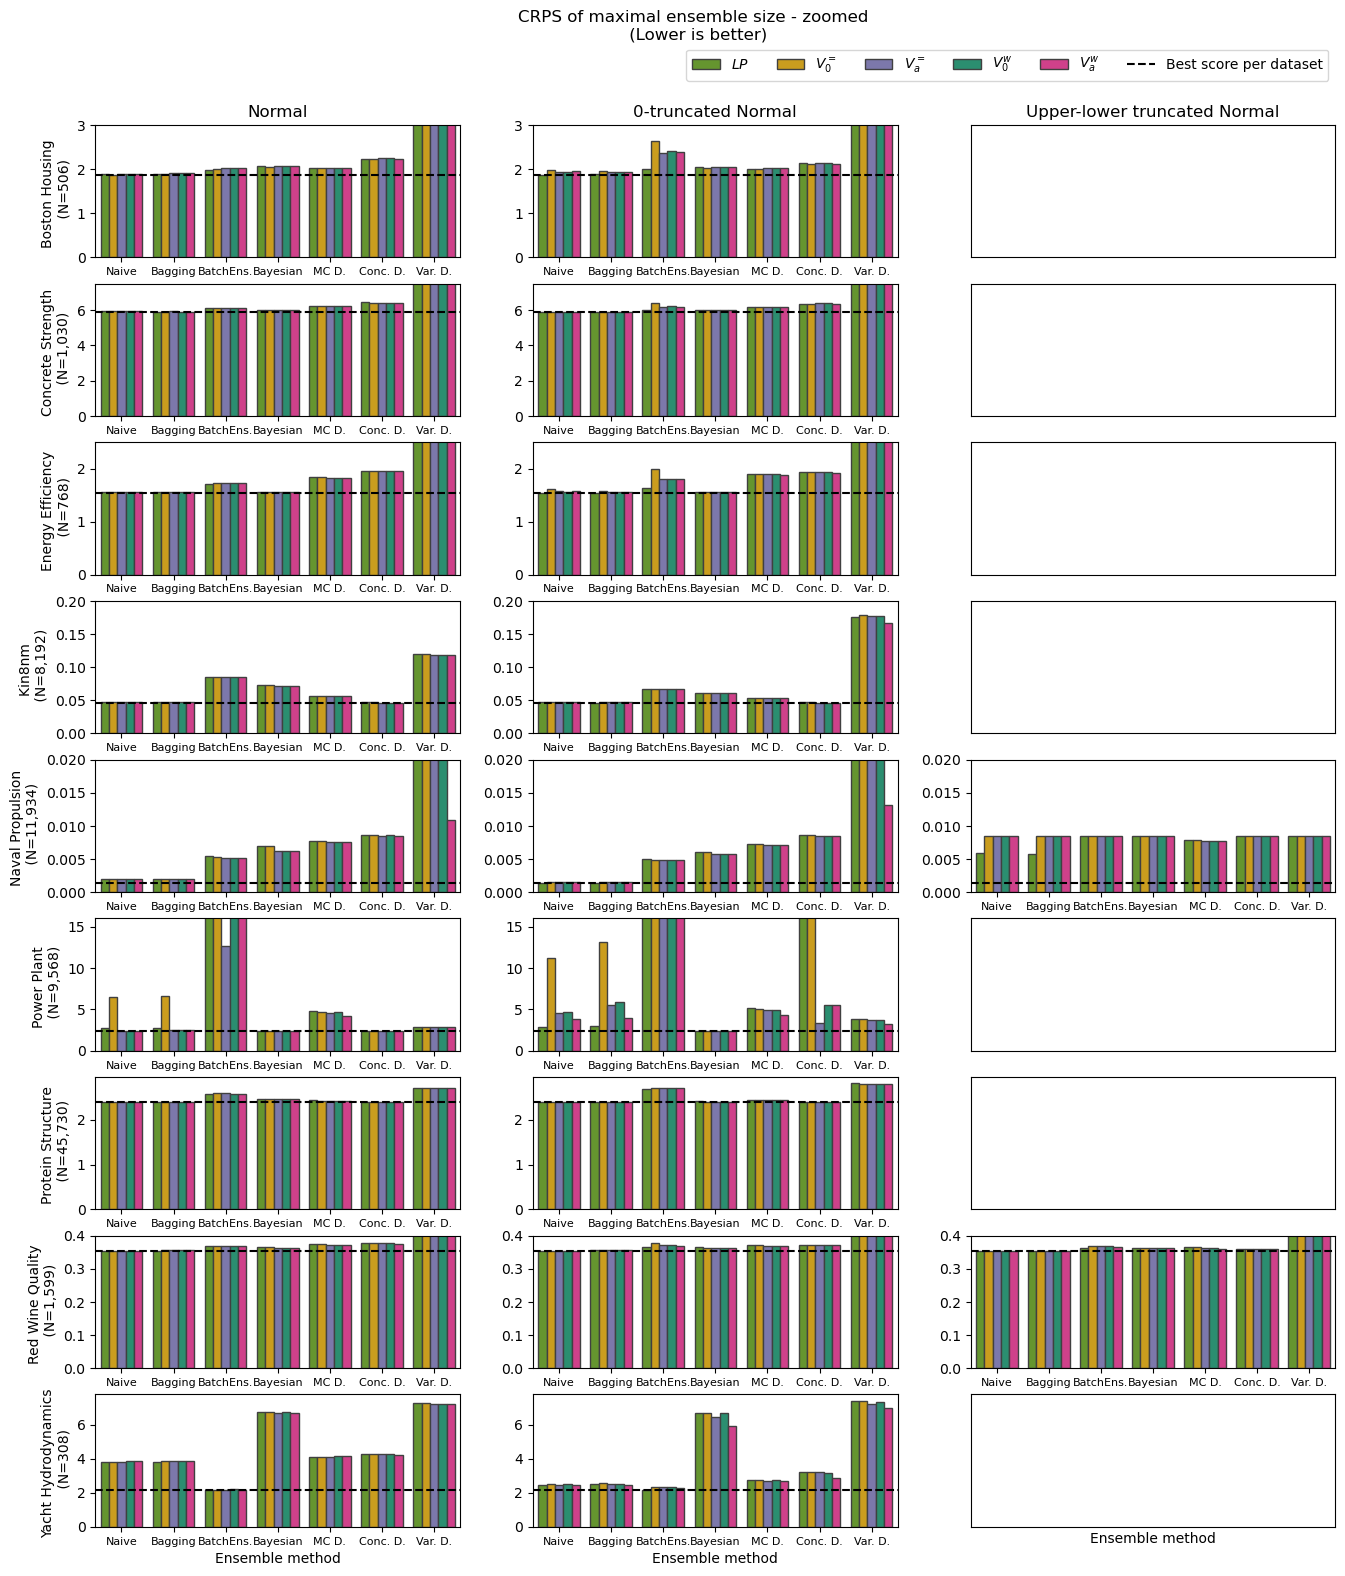

In [16]:
##### Relative score - Barplot - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(distr_ls), figsize=(16,16*1.2), squeeze=False)

# Filter out ensemble mean
df_no_ens = df_scores[df_scores["agg"] != "ens"]

# Iterate over distr types and datasets
for i_distr, distr in enumerate(distr_ls):
    # df_distr = pd.melt(df_scores[i_distr].reset_index(), id_vars="dataset", var_name="ens_method", value_vars=tables_rel[i_distr].columns, value_name="score")
    df_distr = df_no_ens[df_no_ens["distr"] == distr]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_distr_dataset = df_distr[df_distr["dataset"] == dataset]
        
        # Get best score for dataset
        best_score = best_scores[best_scores["dataset"] == dataset]["score_20"].iloc[0]
        
        if (distr=="tnorm") & (dataset not in dataset_ls_tnorm):
            # axs[i_dataset][i_distr].axhline(best_score, linestyle="--", color=kit_cols_dict["black"])
            axs[i_dataset][i_distr].tick_params(axis="both", which="both", left=False, labelleft=False, bottom=False, labelbottom=False)
            continue
        # Plot boxplots
        g = sns.barplot(data=df_distr_dataset, x="ens_method", y="score_20", hue="agg", ax=axs[i_dataset][i_distr], palette=agg_col, edgecolor=kit_cols_dict["grey"], order=ens_method_ls)
        
        # Add 0 line
        g.axhline(best_score, linestyle="--", color=kit_cols_dict["black"])
        # Add labels to x and y axis
        axs[i_dataset][i_distr].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_distr].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls], fontsize=8)
        axs[i_dataset][i_distr].set_xlabel("")
        axs[len(dataset_ls)-1][i_distr].set_xlabel("Ensemble method")
        

# Set y axis range
upper_limit = {
    "boston": 3,
    "concrete": 7.5,
    "energy": 2.5,
    "kin8nm": 0.2,
    "naval": 0.02,
    "power": 16,
    "protein": np.Inf,
    "wine": 0.4,
    "yacht": np.Inf,
}
for idx, (ax_norm, ax_0tnorm, ax_tnorm) in enumerate(axs):
    norm_l, norm_u = ax_norm.get_ylim()
    t0norm_l, t0norm_u = ax_0tnorm.get_ylim()
    tnorm_l, tnorm_u = ax_tnorm.get_ylim()
    
    upper_limit_curr = list(upper_limit.values())[idx]
    
    ax_norm.set_ylim(0, min(upper_limit_curr, max(norm_u, t0norm_u, tnorm_u)))
    ax_0tnorm.set_ylim(0, min(upper_limit_curr, max(norm_u, t0norm_u, tnorm_u)))
    ax_tnorm.set_ylim(0, min(upper_limit_curr, max(norm_u, t0norm_u, tnorm_u)))
    

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)
axhline = matplotlib.lines.Line2D([0], [0], linestyle="dashed", color=kit_cols_dict["black"])  # type: ignore
handles.append(axhline)
labels = [agg_labels.get(agg) for agg in labels]
labels.append("Best score per dataset")

# Set titles and legends
axs[0][0].set_title("Normal")
axs[0][1].set_title("0-truncated Normal")
axs[0][2].set_title("Upper-lower truncated Normal")
fig.subplots_adjust(top=0.84)
fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.883), ncol=len(agg_meths)+1)
fig.suptitle(f"CRPS of maximal ensemble size - zoomed \n (Lower is better)", y=0.9)

# Save figure
if export:
    filename=os.path.join(save_dir, "06_scores_zoomed.pdf")
    fig.savefig(filename, bbox_inches='tight')
    filename=os.path.join(save_dir, "06_scores_zoomed.png")
    fig.savefig(filename, bbox_inches='tight')

In [40]:
df_skills[(df_skills["dataset"] == "boston") & (df_skills["ens_method"] == "batchensemble")]

,ens_method,dataset,nn,agg,skill_2,skill_4,skill_6,skill_8,skill_10,skill_12,skill_14,skill_16,skill_18,skill_20,avg_skill,distr
90,batchensemble,boston,drn,lp,4.698497,5.033350,5.431651,5.633762,5.449972,5.701059,5.900706,5.675782,6.054511,6.002238,5.558153,norm
91,batchensemble,boston,drn,vi,4.419384,4.580028,4.807952,5.007823,4.765119,5.019562,5.265148,5.257518,5.412024,5.479076,5.001364,norm
92,batchensemble,boston,drn,vi-a,3.576723,3.772852,3.858936,4.068635,3.781999,4.042201,4.270375,4.256685,4.399911,4.495251,4.052357,norm
93,batchensemble,boston,drn,vi-w,3.567581,3.689695,3.805991,4.009597,3.739192,4.003127,4.245371,4.184066,4.337859,4.454490,4.003697,norm
94,batchensemble,boston,drn,vi-aw,2.903668,3.245654,3.413217,3.689851,3.470983,3.721782,3.955552,3.968151,4.094414,4.209556,3.667283,norm
475,batchensemble,boston,drn,lp,6.716899,13.742847,14.025812,15.574519,15.954571,15.505358,15.886737,15.689484,14.994387,15.744403,14.383502,0tnorm
476,batchensemble,boston,drn,vi,-9.748745,-12.629168,-17.465648,-15.609892,-16.398564,-15.101882,-13.340004,-13.287713,-12.834311,-11.677414,-13.809334,0tnorm
477,batchensemble,boston,drn,vi-a,-3.568109,-0.589254,-3.281929,-1.643117,-1.383101,-1.275580,0.064877,-0.179653,-0.301558,0.383616,-1.177381,0tnorm
478,batchensemble,boston,drn,vi-w,-5.879473,-3.931628,-6.373841,-4.656822,-4.408222,-4.081967,-2.343813,-2.655714,-2.587618,-1.809600,-3.872870,0tnorm
479,batchensemble,boston,drn,vi-aw,-2.884313,-0.672869,-3.687728,-2.713827,-3.357548,-2.768637,-1.033982,-2.555232,-2.324862,-1.158107,-2.315710,0tnorm


# Archive

In [ ]:
##### Relative score - Barplot - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(distr_ls), figsize=(20,20), squeeze=False)

# Filter out ensemble mean
df_ens = df_scores[df_scores["agg"] == "ens"]

# Iterate over distr types and datasets
for i_distr, distr in enumerate(distr_ls):
    # df_distr = pd.melt(df_scores[i_distr].reset_index(), id_vars="dataset", var_name="ens_method", value_vars=tables_rel[i_distr].columns, value_name="score")
    df_distr = df_ens[df_ens["distr"] == distr]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_distr_dataset = df_distr[df_distr["dataset"] == dataset]
        
        
        if (distr=="tnorm") & (dataset not in dataset_ls_tnorm):
            axs[i_dataset][i_distr].axhline(1, linestyle="--", color=kit_cols_dict["black"])
            continue
        # Plot boxplots
        g = sns.barplot(data=df_distr_dataset, x="ens_method", y="rel_score", hue="agg", ax=axs[i_dataset][i_distr], palette=agg_col, edgecolor=kit_cols_dict["grey"])
        
        # Add 0 line
        g.axhline(1, linestyle="--", color="black")
        # Add labels to x and y axis
        axs[i_dataset][i_distr].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_distr].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls], fontsize=8)
        axs[i_dataset][i_distr].set_xlabel("")
        axs[len(dataset_ls)-1][i_distr].set_xlabel("Ensemble method")
        

# Set y axis range
upper_limit = 100
# Set y axis range
for ax_norm, ax_0tnorm, ax_tnorm in axs:
    norm_l, norm_u = ax_norm.get_ylim()
    t0norm_l, t0norm_u = ax_0tnorm.get_ylim()
    tnorm_l, tnorm_u = ax_tnorm.get_ylim()
    
    ax_norm.set_ylim(0.95, min(upper_limit, max(norm_u, t0norm_u, tnorm_u)))
    ax_0tnorm.set_ylim(0.95, min(upper_limit, max(norm_u, t0norm_u, tnorm_u)))
    ax_tnorm.set_ylim(0.95, min(upper_limit, max(norm_u, t0norm_u, tnorm_u)))
    

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)

# Set titles and legends
axs[0][0].set_title("Normal")
axs[0][1].set_title("0-truncated Normal")
axs[0][2].set_title("Upper-lower truncated Normal")
fig.legend(handles, [agg_labels.get(agg) for agg in labels], loc='upper center', ncol=len(agg_meths))
fig.suptitle(f"Relative score to best score per dataset (Cut-off: {upper_limit})")

# Save figure
# if export:
#     filename=os.path.join(save_dir, "06_relative_scores.pdf")
#     fig.savefig(filename, bbox_inches='tight')
#     filename=os.path.join(save_dir, "06_relative_scores.png")
#     fig.savefig(filename, bbox_inches='tight')